In [125]:
import pandas as pd   
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

1. Upload all data being compared.

In [126]:
hpi=pd.read_csv('../data/hpi_2000-2020.csv')
zip0=pd.read_csv('../data/zip0.csv')
zip1=pd.read_csv('../data/zip1.csv')
zip2=pd.read_csv('../data/zip2.csv')
zip3=pd.read_csv('../data/zip3.csv')
zip4=pd.read_csv('../data/zip4.csv')
zip5=pd.read_csv('../data/zip5.csv')
zip6=pd.read_csv('../data/zip6.csv')
zip7=pd.read_csv('../data/zip7.csv')
zip8=pd.read_csv('../data/zip8.csv')
zip9=pd.read_csv('../data/zip9.csv')

2. Seperate HPI by single digit zip.

In [127]:
hpi_zip0=hpi[hpi['one-digit ZIP']==0]
hpi_zip1=hpi[hpi['one-digit ZIP']==1]
hpi_zip2=hpi[hpi['one-digit ZIP']==2]
hpi_zip3=hpi[hpi['one-digit ZIP']==3]
hpi_zip4=hpi[hpi['one-digit ZIP']==4]
hpi_zip5=hpi[hpi['one-digit ZIP']==5]
hpi_zip6=hpi[hpi['one-digit ZIP']==6]
hpi_zip7=hpi[hpi['one-digit ZIP']==7]
hpi_zip8=hpi[hpi['one-digit ZIP']==8]
hpi_zip9=hpi[hpi['one-digit ZIP']==9]

3. Merge data on matching zips.

In [128]:
zip0_hpi_merge = pd.merge(hpi_zip0,zip0,on='Year')
zip1_hpi_merge = pd.merge(hpi_zip1,zip1,on='Year')
zip2_hpi_merge = pd.merge(hpi_zip2,zip2,on='Year')
zip3_hpi_merge = pd.merge(hpi_zip3,zip3,on='Year')
zip4_hpi_merge = pd.merge(hpi_zip4,zip4,on='Year')
zip5_hpi_merge = pd.merge(hpi_zip5,zip5,on='Year')
zip6_hpi_merge = pd.merge(hpi_zip6,zip6,on='Year')
zip7_hpi_merge = pd.merge(hpi_zip7,zip7,on='Year')
zip8_hpi_merge = pd.merge(hpi_zip8,zip8,on='Year')
zip9_hpi_merge = pd.merge(hpi_zip9,zip9,on='Year')

4. Combine all data back to common dataframe.

In [129]:
ZIP_VS_HPI = pd.concat([zip0_hpi_merge,zip1_hpi_merge,zip2_hpi_merge,zip3_hpi_merge,zip4_hpi_merge,zip5_hpi_merge,zip6_hpi_merge,zip7_hpi_merge,zip8_hpi_merge,zip9_hpi_merge])

5. Rename columns for clarity. 

In [130]:
new_column_names = {'HPI':'1975 HPI base','Annual Change (%)':'Year by year HPI percent change','percent_change':'employment year by year percent change'}

In [131]:
ZIP_VS_HPI.rename(columns=new_column_names,inplace=True)

In [132]:
ZIP_VS_HPI = ZIP_VS_HPI.fillna(0)

In [133]:
ZIP_VS_HPI = ZIP_VS_HPI.drop(['1975 HPI base','Year by year HPI percent change'],axis=1)

In [134]:
ZIP_VS_HPI

,one-digit ZIP,Year,HPI with 2000 base,Percent change since 2000,Percent change since 2010,HPI year by year percent change since 2000,employment_by_thosands,employment year by year percent change,employment percent change since 2000,employment percent change since 2010
0,0,2000,100.000000,0.000000,-33.770619,0.000000,1576.701190,0.000000,0.000000,3.531679
1,0,2001,109.081169,9.081169,-27.756217,9.081169,1579.947619,0.205900,0.205900,3.744850
2,0,2002,119.488961,19.488961,-20.863201,9.541328,1562.577381,-1.099419,-0.895782,2.604260
3,0,2003,128.511558,28.511558,-14.887591,7.550988,1550.591667,-0.767048,-1.655959,1.817237
4,0,2004,145.091299,45.091299,-3.906931,12.901361,1557.476190,0.443993,-1.219318,2.269298
...,...,...,...,...,...,...,...,...,...,...
16,9,2016,193.916591,93.916591,28.429757,7.955119,4509.011667,2.664083,13.921947,14.820819
17,9,2017,206.816705,106.816705,36.973423,6.652403,4603.766667,2.101458,16.315969,17.233731
18,9,2018,222.095568,122.095568,47.092519,7.387635,4696.645000,2.017442,18.662576,19.598854
19,9,2019,230.280000,130.280000,52.513018,3.685095,4768.461667,1.529106,20.477053,21.427647


6. Create pivot tables for use in graphs.

In [135]:
HPI_2000_pivot_table = pd.pivot_table(ZIP_VS_HPI, values='HPI with 2000 base', index='Year', columns='one-digit ZIP')
employment_percent_pivot_table = pd.pivot_table(ZIP_VS_HPI, values='employment_by_thosands', index='Year', columns='one-digit ZIP')

7. Create some base visuals for possible use.

<AxesSubplot:xlabel='Year'>

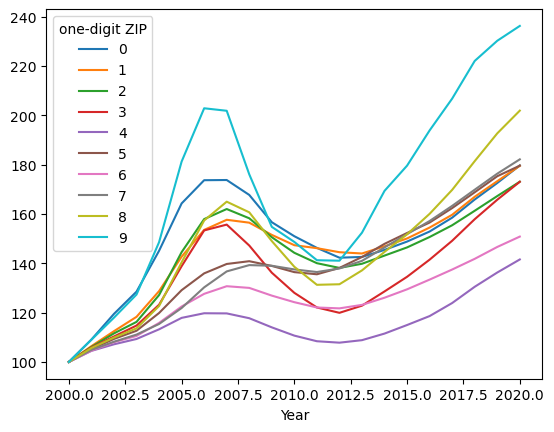

In [136]:
HPI_2000_pivot_table.plot(kind='line')

<AxesSubplot:xlabel='Year'>

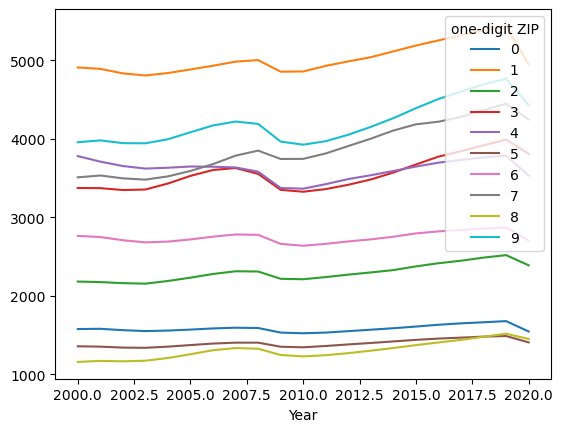

In [137]:
employment_percent_pivot_table.plot(kind='line')